In [1]:
import numpy as np
import pandas as pd 


In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
single_image = X_train[0]

In [7]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
single_image.shape

(28, 28)

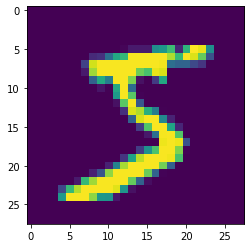

In [9]:
plt.imshow(single_image)

### Preprocessing Data

In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
# OneHot encode the labels
from tensorflow.keras.utils import to_categorical

In [14]:
y_train.shape

(60000,)

In [15]:
y_cat_train = to_categorical(y_train,10)

In [16]:
y_cat_test = to_categorical(y_test,10)

In [17]:
y_cat_train.shape

(60000, 10)

In [18]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [19]:
X_train[0].max()

255

In [20]:
X_train[0].min()

0

In [21]:
#Normalize X data

In [22]:
X_train = X_train/255
X_test  = X_test/255

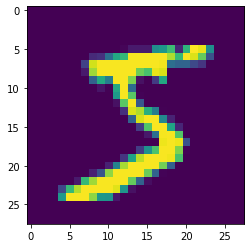

In [24]:
plt.imshow(X_train[0])

In [25]:
#reshaping Data

In [26]:
X_train.shape

(60000, 28, 28)

In [27]:
X_test.shape

(10000, 28, 28)

In [29]:
X_train = X_train.reshape(60000,28,28,1)
X_test  = X_test.reshape(10000,28,28,1)

In [30]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

### Training

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, MaxPool2D, Flatten

In [54]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='selu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='selu'))

#Output layer
model.add(Dense(10,activation='softmax'))

#Compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [56]:
#for the first dense layer the number of params 589952 = 12*12*32*128 + 128 i.e.(input*number_of_neurons + bias for each neuron)

### EarlyStopping

In [57]:
from tensorflow.keras.callbacks import EarlyStopping 

In [58]:
early_stop = EarlyStopping(monitor = 'val_loss',patience = 2,restore_best_weights=True)

### Train the Model

In [59]:
#model.fit(X_train,y_cat_train,epochs=10,validation_data=(X_test,y_cat_test),callbacks=[early_stop])
model.fit(X_train,y_cat_train,epochs=10,validation_data=(X_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1938 - accuracy: 0.9415 - val_loss: 0.1117 - val_accuracy: 0.9641
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0757 - accuracy: 0.9767 - val_loss: 0.0752 - val_accuracy: 0.9755
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0494 - accuracy: 0.9842 - val_loss: 0.0735 - val_accuracy: 0.9772
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0347 - accuracy: 0.9883 - val_loss: 0.0586 - val_accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0242 - accuracy: 0.9922 - val_loss: 0.0724 - val_accuracy: 0.9821
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0198 - accuracy: 0.9936 - val_loss: 0.0713 - val_accuracy: 0.9819


In [60]:
model.metrics_names

['loss', 'accuracy']

In [61]:
losses = pd.DataFrame(model.history.history)

In [62]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.193829,0.941483,0.111723,0.9641
1,0.075727,0.976733,0.075212,0.9755
2,0.049376,0.984233,0.073492,0.9772
3,0.034681,0.988317,0.058633,0.9826
4,0.024163,0.992200,0.072436,0.9821


<AxesSubplot:>

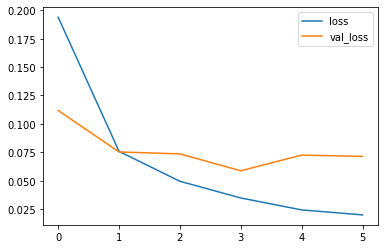

In [63]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

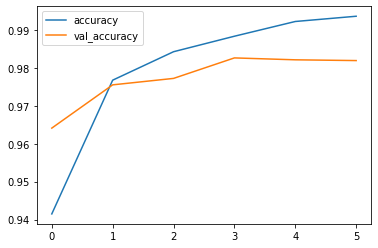

In [64]:
losses[['accuracy','val_accuracy']].plot()

In [65]:
print(model.metrics_names)
print(model.evaluate(X_test,y_cat_test))

['loss', 'accuracy']
313/313 [==============================] - 2s 8ms/step - loss: 0.0586 - accuracy: 0.9826
[0.058633189648389816, 0.9825999736785889]


In [66]:
from  sklearn.metrics import classification_report, confusion_matrix

In [67]:
predict = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [70]:
print(classification_report(y_test,predict))
#note we have used y_test and not y_cat_teabsst

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.99      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.99      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [71]:
#almost a perfect score

In [72]:
print(confusion_matrix(y_test,predict))

[[ 962    0    5    0    1    1    4    3    3    1]
 [   0 1127    1    2    0    1    1    2    1    0]
 [   2    1 1013    2    1    0    2    6    4    1]
 [   0    0    2  998    0    4    0    4    2    0]
 [   0    0    1    0  970    0    2    0    1    8]
 [   3    0    1    5    0  872    3    1    6    1]
 [   3    2    2    1    6    2  939    0    3    0]
 [   1    1    7    2    1    0    0 1006    5    5]
 [   2    0    4    6    0    1    0    1  960    0]
 [   0    3    0    4    9    3    0    6    5  979]]


### Predicting a image

In [73]:
my_number = X_test[341]

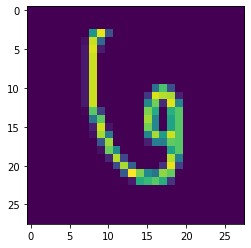

In [74]:
plt.imshow(my_number)

In [75]:
model.predict_classes(my_number.reshape(1,28,28,1))

array([6], dtype=int64)